### Utilize uma rede neural perceptron de múltiplas camadas para aproximar a função abaixo.

- Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela rede neural.
- Apresente também a curva da função custo no treinamento e a curva do erro
médio quadrado com relação ao o conjunto de validação.
- Procure definir a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada camada e o número de neurônios camada de saída.
- Observações: como se trata de um problema de aproximação de funções, considere a camada de saída do tipo linear puro.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Gerar dados
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = X1**2 + X2**2 + 2*X1*X2 + np.cos(X1 + X2) - 1

# Flatten the data for training
X = np.vstack([X1.ravel(), X2.ravel()]).T
y = Y.ravel()

print("Quantidade de dados em x1:", len(x1))
print("Demonstração dos dados em x1:", x1)
print("Quantidade de dados em x2:", len(x2))
print("Demonstração dos dados em x2:", x2)

Quantidade de dados em x1: 100
Demonstração dos dados em x1: [-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2

In [9]:
# Dividir dados em conjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir a rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
)

# Treinar o modelo e guardar a função custo de validação em cada iteração
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 308.9229 - val_loss: 40.2286
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 20.2954 - val_loss: 9.7189
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 4.5065 - val_loss: 1.6780
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.9709 - val_loss: 0.5706
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4314 - val_loss: 0.3004
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.2711 - val_loss: 0.2347
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1881 - val_loss: 0.1501
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.1042
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.1112 - val_loss: 0.0755
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.0920 - va

313/313 [==============================] - 1s 2ms/step


Text(0.5, 0.92, 'Função aproximada pela MLP')

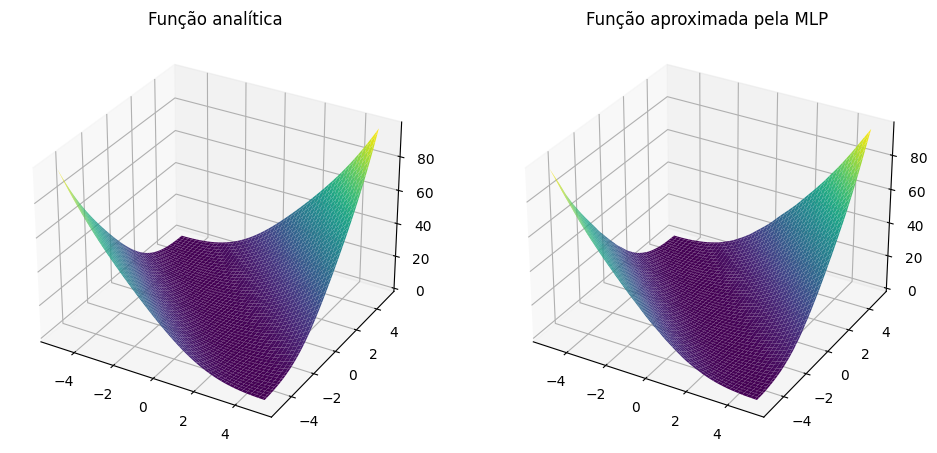

In [10]:
# Predições
y_pred = model.predict(X)

# Plotar a função analítica e a função aproximada
fig = plt.figure(figsize=(18, 6))

# Gráfico da função analítica
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='viridis')
ax.set_title('Função analítica')

# Gráfico da função aproximada
Y_pred = y_pred.reshape(X1.shape)
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.plot_surface(X1, X2, Y_pred, cmap='viridis')
ax.set_title('Função aproximada pela MLP')





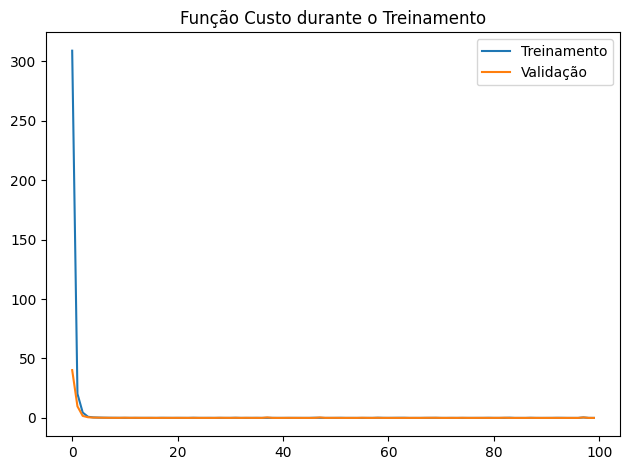

In [13]:
# Plotar a curva de custo durante o treinamento
plt.figure()
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.legend()
plt.title('Função Custo durante o Treinamento')

plt.tight_layout()
plt.show()

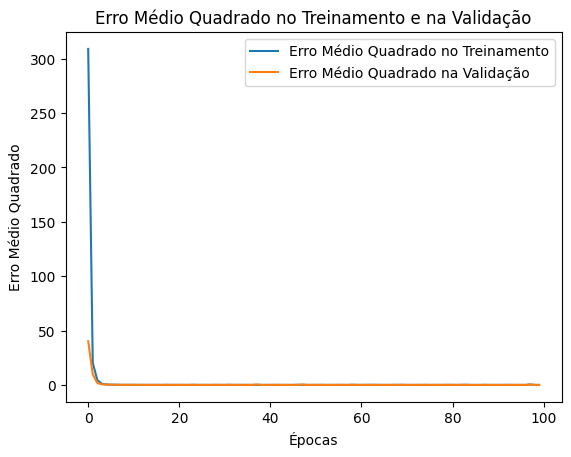

In [12]:
# Plotar a curva de erro médio quadrado no treinamento e na validação
plt.figure()
plt.plot(history.history['loss'], label='Erro Médio Quadrado no Treinamento')
plt.plot(history.history['val_loss'], label='Erro Médio Quadrado na Validação')
plt.legend()
plt.title('Erro Médio Quadrado no Treinamento e na Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Quadrado')
plt.show()

### Conclusão
- Foi possível verificar o quão precisa é a MLP para aproximação de funções;
- O erro diminui com o número de épocas rapidamente;
- Como a curva de custo foi definida como a 'mean_squared_error' na qual é o erro médio quadrado, terá o mesmo resultado se plotar separadamente;